Data preprocessing:

    Remove image tag
    convert emoji
    keep only words and spaces
    correct spellings

DO NOT RUN!!! Takes long time Note: cleaned files included


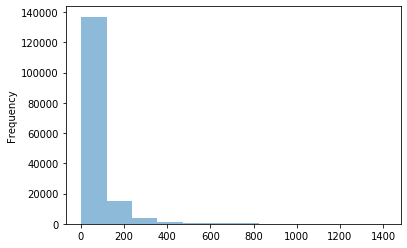

In [1]:
import pandas as pd
train = pd.read_csv('input/train.csv')
train['number_of_words'] = train['comment_text'].apply(lambda x: len(x.split()))
ax = train['number_of_words'].plot.hist(bins=12, alpha=0.5)

In [2]:
!pip install nltk
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/ubuntu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stops =  set(stopwords.words('english')+['com'])
co = CountVectorizer(stop_words=stops)
counts = co.fit_transform(train['comment_text'])
pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(10)

,0
article,57661
wikipedia,48427
page,46460
talk,37094
please,29794
would,29323
one,29179
like,28008
see,21603
also,20641


In [11]:
import pandas as pd

import emoji
import re
import numpy as np
import pandas as pd
from autocorrect import Speller


spell = Speller(lang='en')

def preprocess(inp):
    x = emoji.demojize(inp)
    x= re.sub(r"Image:.*(?:.jpg|.svg|.png|.jpeg|.gif|.tif|.ext)",' ',x,flags=re.IGNORECASE)
    x= re.sub(r"File:.*(?:.jpg|.svg|.png|.jpeg|.gif|.tif|.ext)",' ',x,flags=re.IGNORECASE)
    x= re.sub(r'[^a-zA-Z\s]',' ',x)
    x= re.sub(r'[\n]',' ',x) 
    x = re.sub(r'\w(?:wikipedia|page|article)', ' ',x)
    #x = spell(inp)
    return str(x)   


This is wikipedia   article


In [ ]:
train = pd.read_csv('input/train.csv')
train['comment_text'] = train['comment_text'].fillna(' ').apply(lambda x: preprocess(x))
train.to_csv('cleaned/train.csv', index=False)

test = pd.read_csv('input/test.csv')
test['comment_text'] = test['comment_text'].fillna(' ').apply(lambda x: preprocess(x))
test.to_csv('cleaned/train.csv', index=False)